In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#@Author Keiser, Haider

# Description
The CSV file of the fish was downloaded from https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data?resource=download. There is the following meta data:
* Species: Species of the fish
* Length: Length of the fish
* Weight: Weight of the fish
* W_l_ratio: Weight by length

This data was created using the paper ‘Length-weight relationships of nine ﬁsh species from the Tetulia River, southern Bangladesh’.

# Data preperation
* renaming column names
* check for empty data and duplicates

Are there duplicates in your data set? If so, which ones?
* Yes, there are a total of 109 duplicates from 4080 data records.
Is there any data that is not relevant?
* No.
Think about a strategy for dealing with NAN values. Try out different
methods. How does the strategy affect your data set?

* There are no NAN values in the data set.
Think about a strategy for dealing with outliers. How could you handle outliers in
handle outliers in your data set? How many % are affected?
* Length: No outliers were identified.
* Weight: 455 entries (about 11.15 %) were recognised as outliers. These values are above 6.01 kg.
* W/L ratio: 17 entries (approx. 0.42 %) were identified as outliers. These values are above 0.6.
Strategy for dealing with outliers**:
* Filter or remove: outliers above the thresholds could be removed,
* if they are considered erroneous or atypical for the analysis.
Replace: 
* Alternatively, the outliers can be replaced by the median or mean value of the respective column to reduce the influence of extreme values.
Transformation:
 * If the values deviate greatly, logarithmic or robust transformations could also help to adjust the distribution.


In [4]:
df = pd.read_csv("files\\fish_data.csv")
df.columns = ['species', 'length', 'weight', 'weight/length']

In [108]:
df.groupby(['species'])['weight'].mean()

species
Bronze croaker                   3.198355
Climbing perch                   3.271239
Gangetic whiting                 6.143143
Goldspotted grenadier anchovy    2.747711
Pama croaker                     3.849563
Paradise threadfin               3.989782
Rosy barb                        4.585453
Scaly hairfin anchovy            3.101750
Spanner barb                     2.632799
Name: weight, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species_numeric'] = le.fit_transform(df['species'])  # Convert species to numeric value

In [110]:
df.duplicated().sum()

109

## Fish species with their average weight:

C:\Users\haide\AppData\Local\Temp\ipykernel_24724\2883489569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')


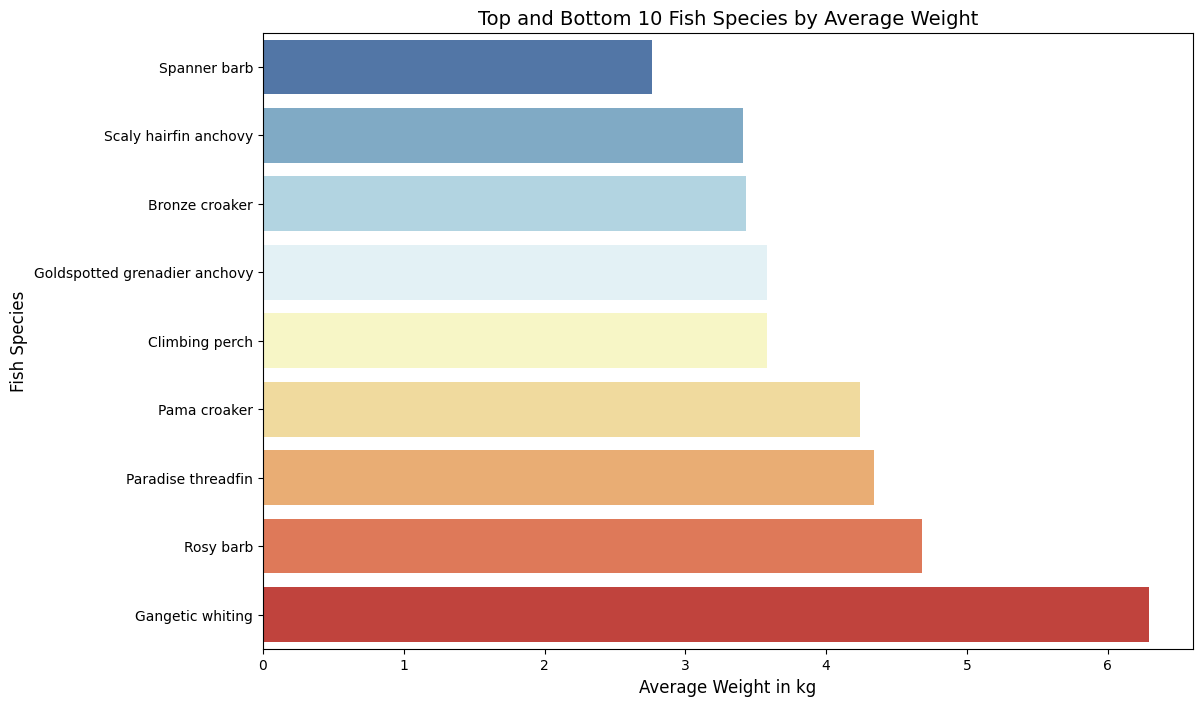

In [6]:

fish_ladder_avg = df.groupby(['species'])['weight'].max().sort_values()

top_10 = fish_ladder_avg.tail(10)

least_10 = fish_ladder_avg.head(10)

bottom_top = pd.concat([top_10, least_10])

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')

plt.title('Top and Bottom 10 Fish Species by Average Weight', fontsize=14)
plt.xlabel('Average Weight in kg', fontsize=12)
plt.ylabel('Fish Species', fontsize=12)
plt.show()


## Fish species with their average length:

C:\Users\haide\AppData\Local\Temp\ipykernel_24724\1799613240.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')


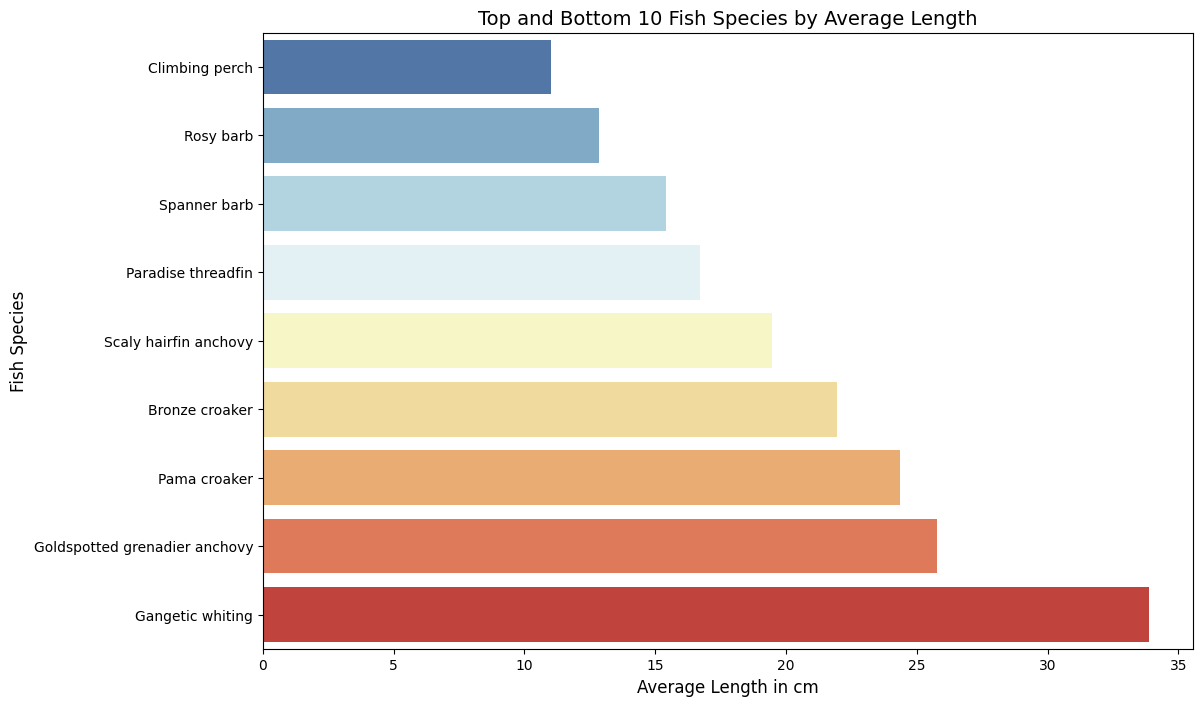

In [7]:
fish_ladder_avg = df.groupby(['species'])['length'].max().sort_values()

top_10 = fish_ladder_avg.tail(10)

least_10 = fish_ladder_avg.head(10)

bottom_top = pd.concat([top_10, least_10])

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')

plt.title('Top and Bottom 10 Fish Species by Average Length', fontsize=14)
plt.xlabel('Average Length in cm', fontsize=12)
plt.ylabel('Fish Species', fontsize=12)
plt.show()

You can see from the two bar charts that length does not necessarily correlate with weight. The fish Rosybarb, for example, is very heavy, but is the second smallest fish.

In [114]:
array = np.array(df['weight'])
#array = np.array([df['weight'], df['length']])
array

array([3.45, 3.27, 3.46, ..., 6.25, 6.11, 6.14])

In [115]:
np.mean(array)

3.739875

In [116]:
np.sum(array)

15258.69

In [117]:
np.min(array)

2.05

In [118]:
np.max(array)

6.29

In [119]:
np.argmin(array) #Index of the minimum value


828

In [120]:
np.argmax(array)


4016

In [121]:
np.sort(array)[:3]

array([2.05, 2.09, 2.15])

In [122]:
np.sort(array)[-3:]


array([6.27, 6.27, 6.29])

# Data visualization

## Violin Plot

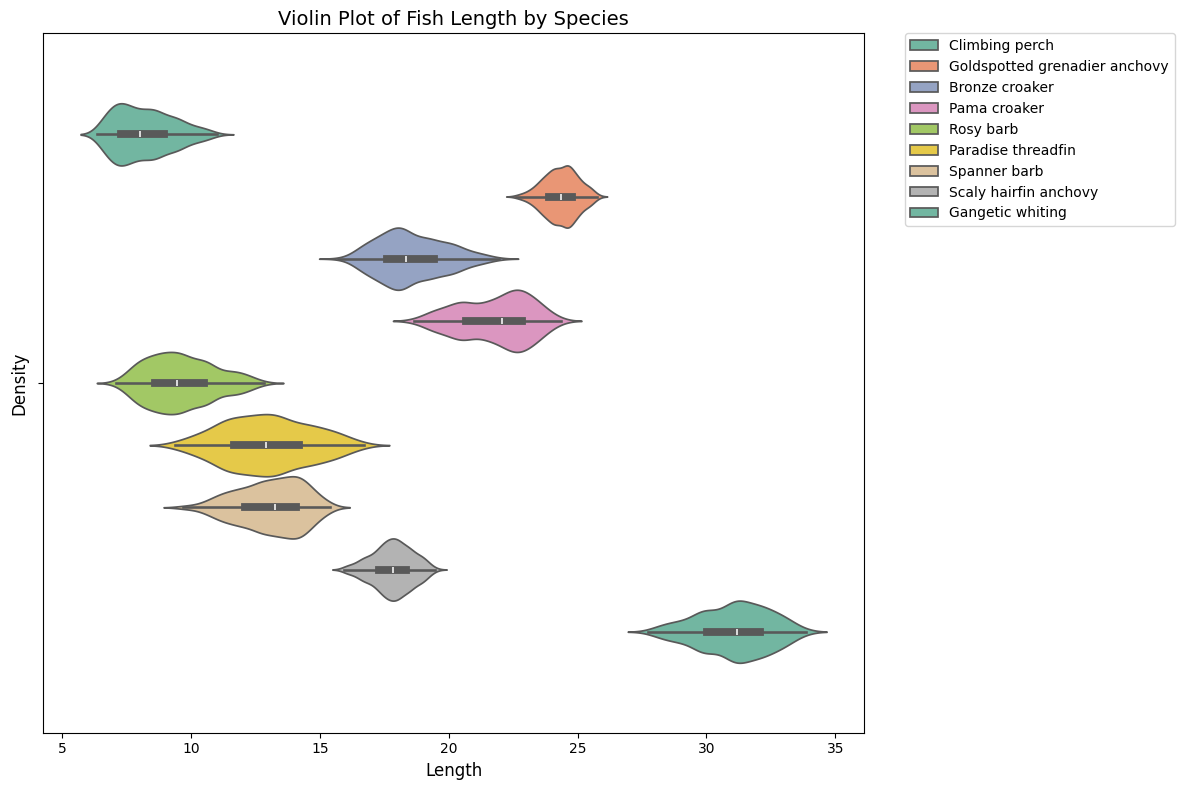

In [8]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='length', data=df, palette='Set2', hue='species', gridsize=300)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Violin Plot of Fish Length by Species', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Scatterplot
In this graph, the individual fish groups are visualised according to species and their length. The colouring of the data points shows that two species overlap in length.

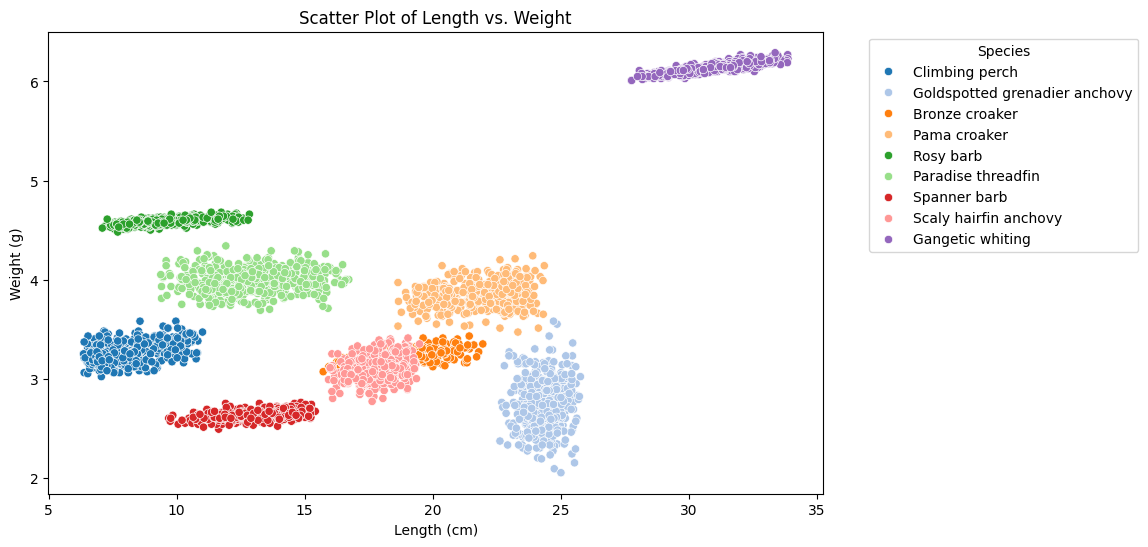

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length', y='weight', hue='species', data=df, palette='tab20')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Scatter Plot of Length vs. Weight')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Boxplot
There are no errors in the data set, but there are still outliers, as you can see in this boxplot diagram.

C:\Users\haide\AppData\Local\Temp\ipykernel_24724\1031999632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='weight', data=df, palette='Set3')


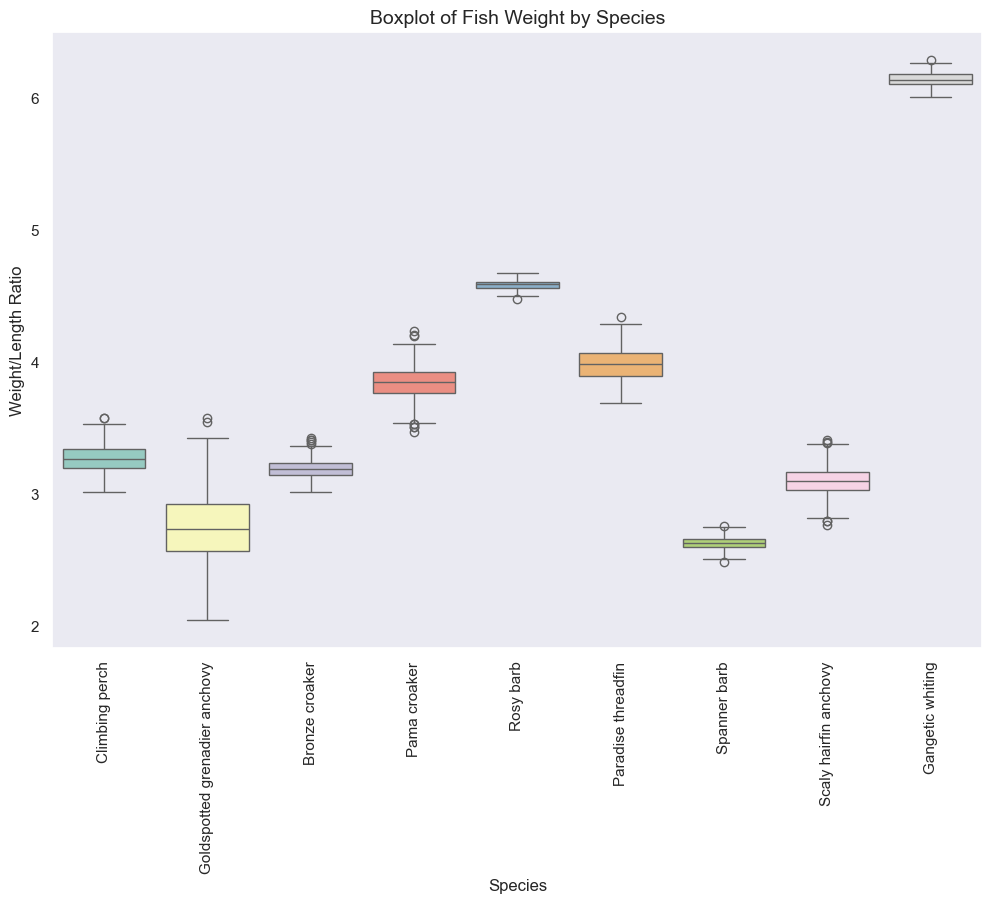

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='weight', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Boxplot of Fish Weight by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Weight/Length Ratio', fontsize=12)
plt.show()

# Predictions

## Prediction of the fish species:
Can be performed using an ML classifier. Quality can be measured with a confusion matrix, for example.

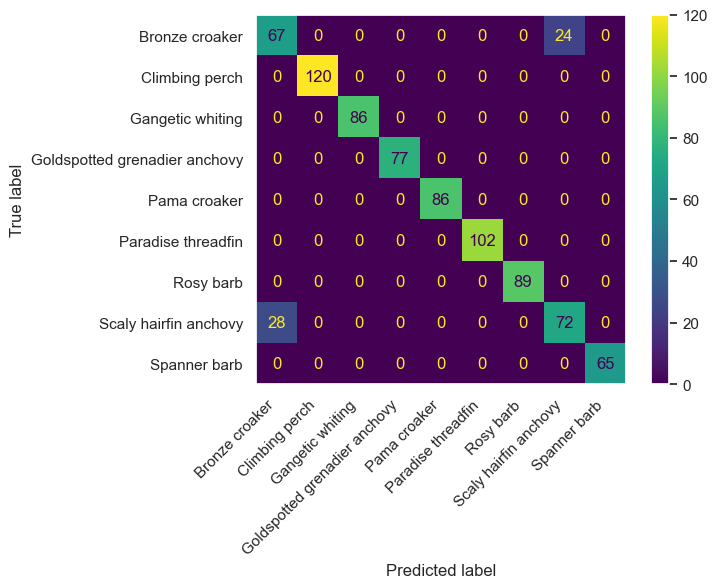

In [16]:
X = df[['length', 'weight', 'weight/length']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## Prediction of the weight of a fish using their length:
A regression is used here, the quality is measured with an R2 score.


In [17]:
X = df[['length', 'weight/length']].values
y = df['weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.18216916576080233
R-squared: 0.821232767431459


## Prediction of the length of a fish using their weight:

In [18]:
X = df[['weight', 'weight/length']]
y = df['length']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.967385110894103
R-squared: 0.9211724648548799


## Prediction of the weight of a fish using their length:

In [19]:
X = df[['length']].values
y = df['weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Accuracy: ', r2)

Accuracy:  0.16278470090854813


# Linear Regression

In [13]:
X = df[['length', 'weight']].values
y = df['species_numeric'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Evaluation
print('Accuracy: ', r2) # how accurate the test is, compared to the prediction = r2

Accuracy:  0.016172009438415236


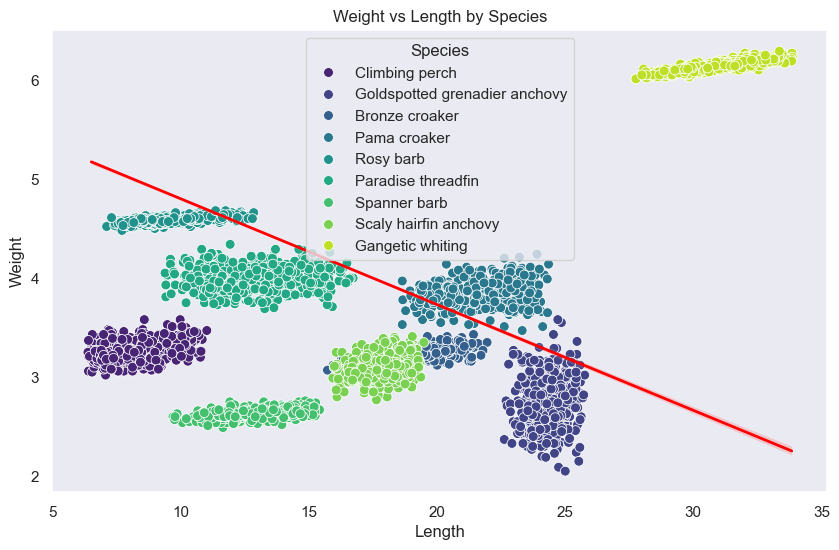

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="dark")
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x='length', y='weight', hue='species', palette='viridis', s=50)

# Fit a smooth regression trendline (works well for non-linear relationships)
sns.regplot(x=X_test[:, 0], y=y_pred, scatter=False, color="red", line_kws={"linewidth": 2}) #line_kws

# Titles and labels
plt.title("Weight vs Length by Species")
plt.xlabel("Length")
plt.ylabel("Weight")

# Show legend
plt.legend(title='Species')
plt.show()


Length and weight by species

# Model Validation 
* Length and weight are predictable

Regression:
#### Which numerical values in your data set can you predict with a regression model?
* The data set contains the numerical columns ‘weight’, ‘length’ and ‘weight/length’.
* ‘weight/length’ are included. Each of these attributes could potentially be used as a target variable for
* a regression.

#### Which pre-processing steps are necessary?
* Sort data: Sorting the data usually helps with temporal or
* ordered dependencies. For a regression based on individual variables
* regression based on individual variables, however, it may be a priority to remove data with missing values or
* to supplement, scale or normalise the data if different scales occur.

Feature engineering:
* The creation of new variables, such as quadratic or
* logarithmic transformations of length or weight, could improve model performance.

Train-Test-Split:
* Splitting the data set into training and test data
* is important to evaluate the model on independent data.

Standardisation/Normalisation:
* Numerical values should be standardised
* or normalised so that the model is not influenced by the different
* magnitudes.

#### How well does the model work? Explain what the individual values from the Confusion Matrix mean.
* Confusion matrix values are not generated in a regression because this is a classification metric.
* Classification metric. Instead, metrics such as Mean Absolute Error (MAE),
* Mean Squared Error (MSE) or R² (coefficient of determination) are more suitable to evaluate the
* model performance. These metrics provide information about the average
* deviation of the predictions from the actual value.

### Decision Tree:
##### What classes for the predictions are there in your data set? Is your data set balanced?
* If the data set is used for classification, discrete classes must be present.
* must be present. In the current data set, however, only continuous values
* such as weight and length.
    * A possible class formation could be done by discretising the weight
    * or the ratio of weight to length, e.g. categorisation into
    * categories such as ‘light’, ‘medium’, ‘heavy’ based on weight classes.
* To check whether the data set is balanced, we would need to analyse the frequency of each
* class (e.g. weight or height categories). An unbalanced
* data set could lead to distortions in the decision tree.

#### What pre-processing steps are necessary?
* Discretisation: Since values such as weight and length are continuous, discretisation is necessary to
* discretisation is necessary to create meaningful classes.

Feature scaling:
* Although decision trees are insensitive to
* scaling, it is still advisable to transform data consistently,
* to enable better interpretations and visualisations.

Categorisation:
* The categorisation must be meaningful and tailored to the
* use case.

#### How well does the model work? Explain what the individual values from the Confusion Matrix mean.

For the evaluation of a decision tree model, a Confusion Matrix
is used to compare the actual and predicted classes. It shows:
* True Positives (TP): Number of correctly predicted positive classes.
* True Negatives (TN): Number of correctly predicted negative classes.
* False Positives (FP): Number of negative classes incorrectly predicted as positive.
* False Negatives (FN): Number of positive classes incorrectly predicted as negative.
The Confusion Matrix can be used to calculate metrics such as Accuracy, Precision,
Recall and the F1-Score can be calculated from the Confusion Matrix in order to comprehensively evaluate the model.

[Text(0.5909090909090909, 0.875, 'weight <= 4.41\ngini = 0.889\nsamples = 4080\nvalue = [468, 476, 455, 415, 435, 458, 475, 480, 418]'),
 Text(0.36363636363636365, 0.625, 'weight <= 3.52\ngini = 0.857\nsamples = 3150\nvalue = [468.0, 476.0, 0.0, 415.0, 435.0, 458.0, 0.0, 480.0\n418.0]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'length <= 15.565\ngini = 0.8\nsamples = 2255\nvalue = [468, 473, 0, 413, 3, 0, 0, 480, 418]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.498\nsamples = 891\nvalue = [0, 473, 0, 0, 0, 0, 0, 0, 418]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.667\nsamples = 1364\nvalue = [468.0, 0.0, 0.0, 413.0, 3.0, 0.0, 0.0, 480.0, 0.0]'),
 Text(0.5454545454545454, 0.375, 'length <= 17.68\ngini = 0.505\nsamples = 895\nvalue = [0.0, 3.0, 0.0, 2.0, 432.0, 458.0, 0.0, 0.0, 0.0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.013\nsamples = 461\nvalue = [0, 3, 0, 0, 0, 458, 0, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.009\nsamples = 

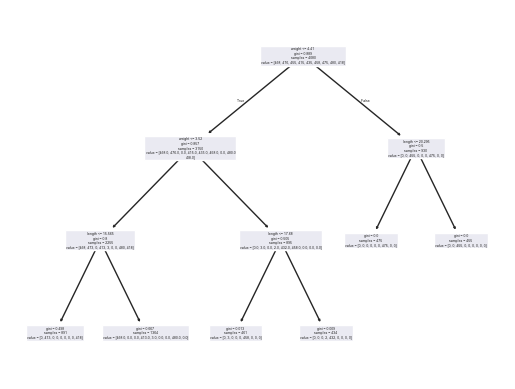

In [20]:
# Initialize the Decision Tree Classifier
features = ['length', 'weight']
X = df[features]
y = df['species']

dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

# Decision Tree
* Length and weight by species

#### Which pre-tuning is useful for your decision tree/forest? What would you start with?
* Maximum depth of the tree (max_depth): Limiting the depth prevents overfitting.
* Start values: None (no limit) or values like 3-10.
* Minimum number of data points in a leaf (min_samples_leaf):
    * Start value: 1 or 2, higher values promote generalisation.
* Number of features for splits (max_features): Testing sqrt, log2 or a
* fixed number.
* Criterion: gini or entropy (decision tree algorithm).
* For random forests: number of trees (n_estimators), starting value: 100.
#### How well does the model work? What influence do different values have on pre-tuning?
* Model performance is usually measured by metrics such as accuracy,
precision, recall or F1-score, depending on the problem.
* With the current data, it appears to be a classification problem based on
on the features length, weight, and w_l_ratio.
* A simple train-test split can provide initial performance results. A
baseline test helps to estimate how much the pre-tuning can improve the model.
can improve the model.
#### Have you found any other parameters for optimising decision trees and random forests that are helpful for a good result?
* Small maximum depth (max_depth): Can lead to an underfitting model
(underfitting), especially with more complex data.
* Large maximum depth: Can lead to overfitting if the model reacts too
specific to the training.
* High values for min_samples_leaf: Promote generalisation, but reduce the resolution of the model.
the resolution of the model.
* Random forest n_estimators: Too few trees provide unstable results,
while too many trees take up computing time.
#### What are the differences between the models you have trained?
* Decision tree: Single tree, prone to overfitting.
* Random Forest: Ensemble approach that combines multiple trees. Stronger
against overfitting, but more computationally intensive.
#### Which features are relevant for your model (Feature Importance)? 
What happens if you leave out unimportant features? Did you expect this result?

* Random Forests offer an intuitive method for evaluating feature importance.
importance. This can be done by the reduction of Gini-Impurity or by
permutation methods.

What happens if unimportant features are omitted?
* As a rule, model performance increases as redundant or irrelevant data is avoided.
data are avoided.
* The results depend on whether a feature actually contains little information
information or whether it is strongly correlated with others

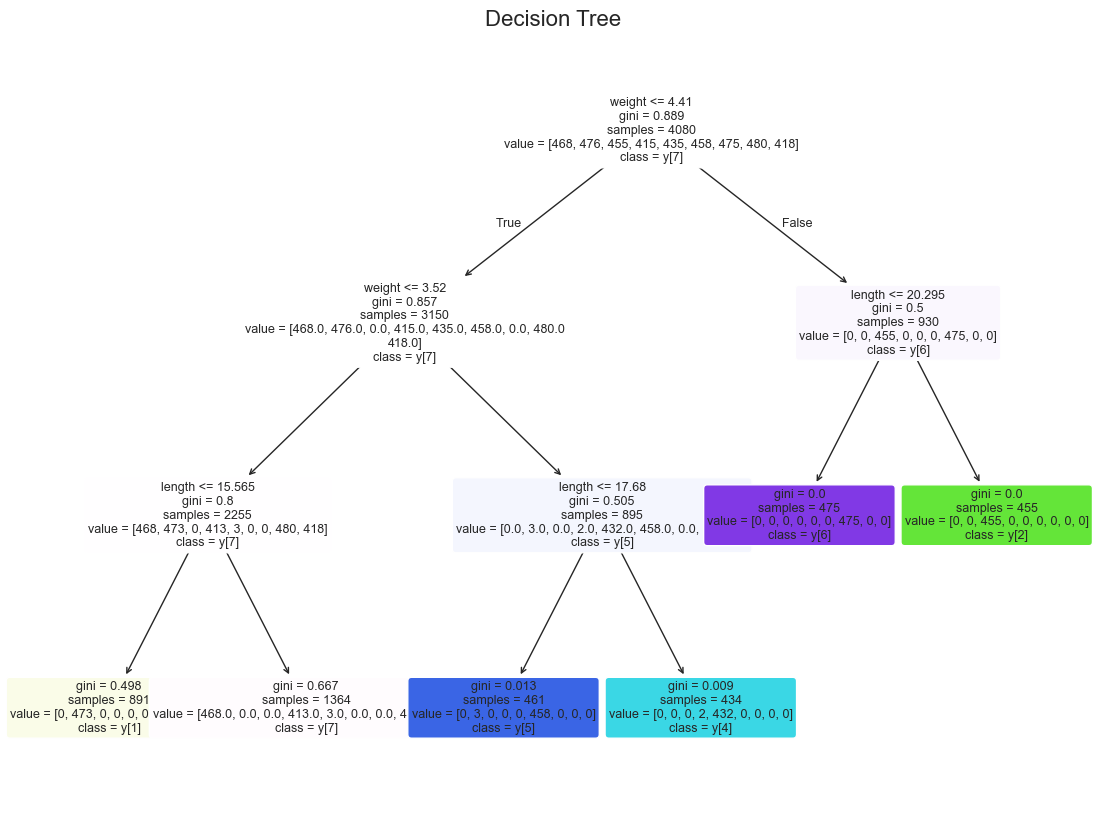

In [21]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree", fontsize=16)
plt.show()
# gini = how mixed classes are
# sample = number of data points
# values = distribution of data points
# class lable based on the majority of samples

# Confusion Matrix

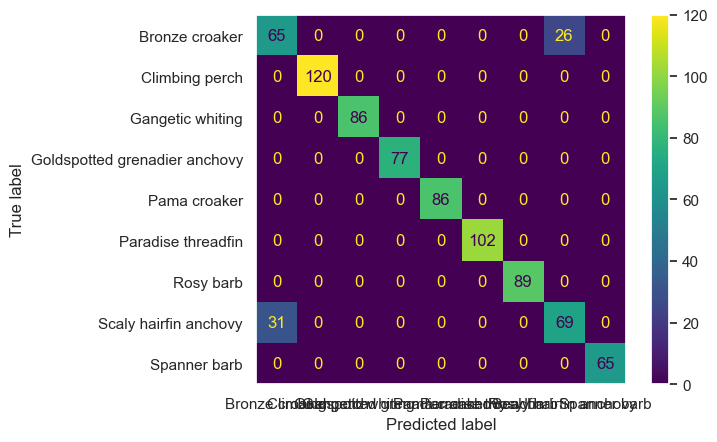

In [129]:
class_names = y
X = df[['length', 'weight']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # reshape data accordingly here!

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# KNN-Classifier
* Precision of each species
* Recall = fewer FN (false negatives)
* Support = Number of true instances

#### What does your data look like after scaling?
* They were divided into classes, whereby the Bronze Croaker and the Scaly hairfin anchovy often cannot be classified accurately (as the weight is similar)
#### What K value would you choose to start with?
* I would start with 9 as there are 9 different classes
#### What does the result of your model look like? How does the result change with a different K value?
* The precision changes

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df[['length', 'weight']], df['species'], test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the KNN model
k = 9  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.928921568627451

Classification Report:
                                precision    recall  f1-score   support

               Bronze croaker       0.67      0.76      0.71       141
               Climbing perch       1.00      1.00      1.00       160
             Gangetic whiting       1.00      1.00      1.00       127
Goldspotted grenadier anchovy       1.00      1.00      1.00       125
                 Pama croaker       1.00      1.00      1.00       129
           Paradise threadfin       1.00      1.00      1.00       159
                    Rosy barb       1.00      1.00      1.00       132
        Scaly hairfin anchovy       0.73      0.64      0.68       146
                 Spanner barb       1.00      1.00      1.00       105

                     accuracy                           0.93      1224
                    macro avg       0.93      0.93      0.93      1224
                 weighted avg       0.93      0.93      0.93      1224


# KNN-Regression
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df[['weight', 'length']], df['species_numeric'], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the KNN regressor
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.4641884531590414
R-squared: 0.6229783869804264


## Values for different K-Values
RMSE --> Root mean square error

A smaller RMSE value implies:
* Less deviation between the predicted and true values.
* Higher accuracy of the model.
Best K-Value ==> 20

In [132]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.9603921176392138
RMSE value for k=  2 is: 1.631585449319579
RMSE value for k=  3 is: 1.5697733763696724
RMSE value for k=  4 is: 1.4821497122787033
RMSE value for k=  5 is: 1.464832855351643
RMSE value for k=  6 is: 1.4596515983860752
RMSE value for k=  7 is: 1.4396801976927553
RMSE value for k=  8 is: 1.434212726841222
RMSE value for k=  9 is: 1.4237509230458396
RMSE value for k=  10 is: 1.4306132991709206
RMSE value for k=  11 is: 1.4325642455452563
RMSE value for k=  12 is: 1.4360725127870706
RMSE value for k=  13 is: 1.4377302929984814
RMSE value for k=  14 is: 1.4296236496056591
RMSE value for k=  15 is: 1.4272843174629983
RMSE value for k=  16 is: 1.429100165305249
RMSE value for k=  17 is: 1.437828597357226
RMSE value for k=  18 is: 1.4382802735361708
RMSE value for k=  19 is: 1.4251508005095972
RMSE value for k=  20 is: 1.4202524544297488


In [133]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<Axes: >

## Best K-Value

In [134]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

# Support Vector Machines (SVMs)

#### Musst du bei SVMs eine Skalierung verwenden? Wenn ja, welche ist für dich am sinnvollsten?
Ohne der Skalierung der Daten sinkt die Accuracy drastisch
#### Welche Kernel Funktion könntest du für deine Problemstellung ausprobieren?
* Rbf ist in diesem Fall die bessere Kernelfunktion, da diese komplexe Muster erfasst.
#### Wie verändert sich dein Ergebnis?
Verändere den C Wert (Regulazation Parameter) deines Support Vector Classifiers.
Desto größer der C-Wert ist, desto weniger ist die Fehlerquote der ersten Klasse, wobei der Fehler der korrelierenden Klasse größer wird.
C = Dieser Wert definiert, wie hoch der zugelassenen Fehler bei der
Suche nach der optimalen Hyperplane ist. Was passiert, wenn du den Wert
veränderst?
#### Wie schneidet die Support Vector Machine gegenüber den anderen Modellen ab?
Die Accuracy der Klasse 1 ist besser als bei den anderen, aber die der korrelierenden Klasse ist schlechter

In [135]:
from sklearn.svm import SVC

# Features (X) and target (y)
X = df[['length', 'weight']]
y = df['species']

# Convert species to numeric labels (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Encodes species as integers

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', C=10.0, gamma='scale')  # Default parameters
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9338235294117647
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        91
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        89
           7       0.75      0.69      0.72       100
           8       1.00      1.00      1.00        65

    accuracy                           0.93       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.93      0.93      0.93       816

Confusion Matrix:
[[ 68   0   0   0   0   0   0  23   0]
 [  0 120   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0]
 [  0   0   0  77   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 102   0 

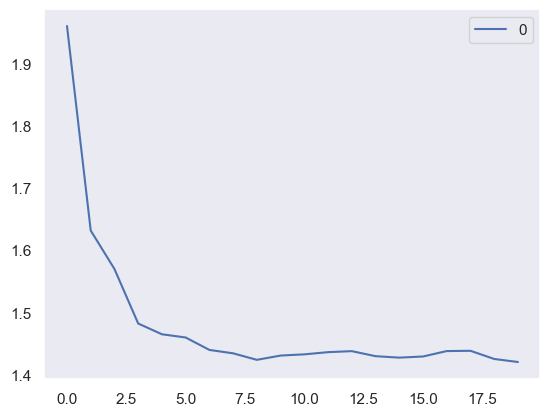

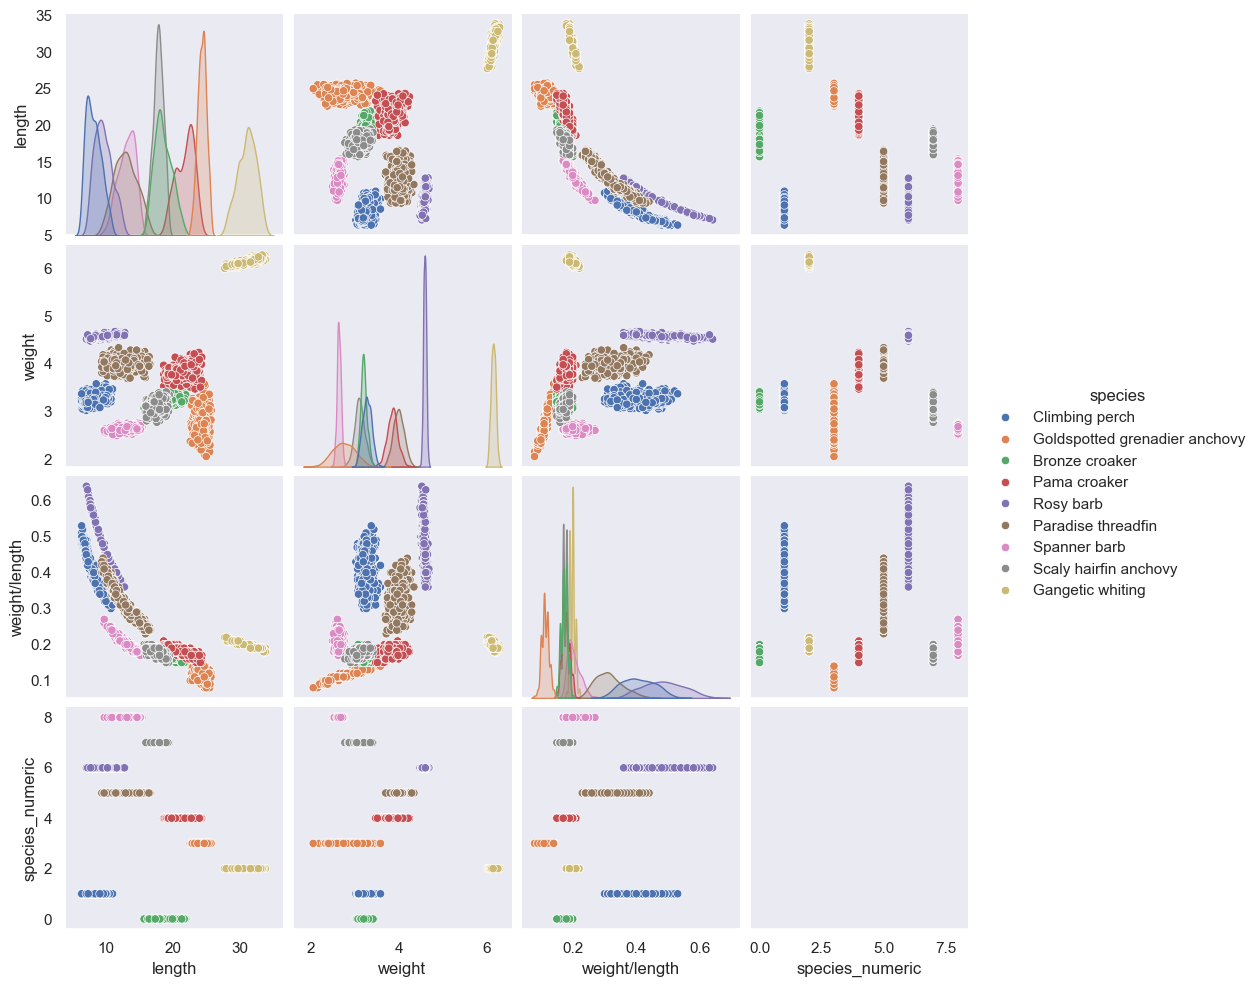

In [136]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()


# Clustering (K-Means)

#### Wie viele Gruppen denkst du, dass es in deinen Daten gibt? Probiere diesen Wert als ersten Startwert für K.
9, da es 9 verschiedene Speziesen gibt.
#### Visualisiere die Gruppen, die von K-Means identifiziert wurde anhand zweier Features
Inhertia visualization schlägt K = 2 vor, wobei ein wert von 9 gebraucht wird, da es 9 Speziesen sind.
K-Means ist nicht gut für diese Daten, da es auch überlappungen verschiedener Gruppen gibt

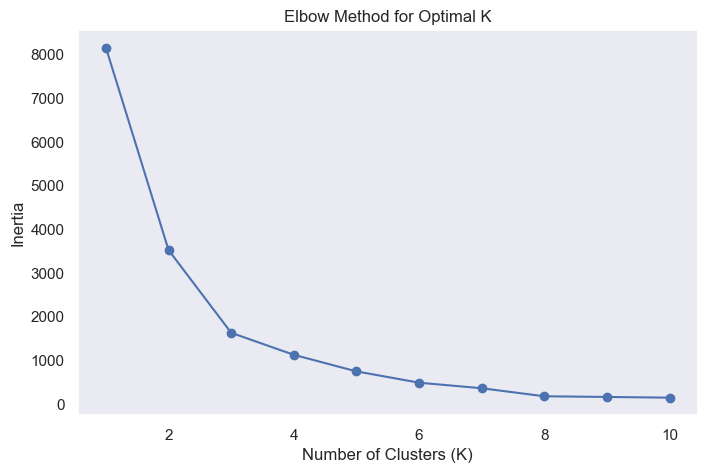

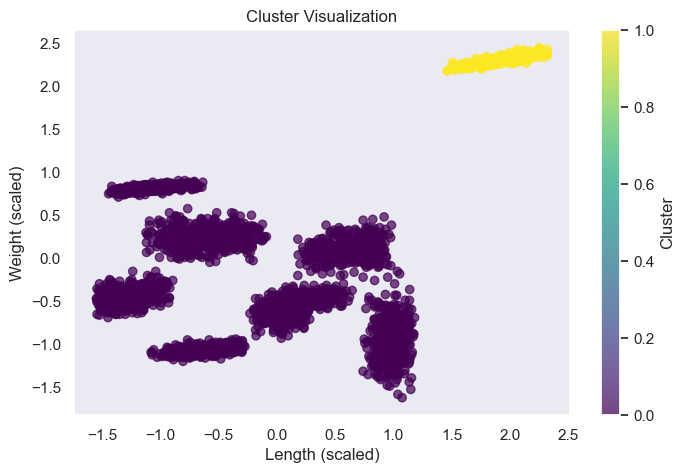

In [137]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select numerical features
X = df[['length', 'weight']]

# Scale the data (K-Means is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters
inertia = [] # = wie nahe die Cluster beisammen sind
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia') # trägheit
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('Length (scaled)')
plt.ylabel('Weight (scaled)')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()


Cluster Centers:
[[ 0.62758848  0.10079651]
 [-1.28966084 -0.45050832]
 [ 1.9277116   2.31030759]
 [ 0.11267311 -0.56834266]
 [-1.08826917  0.80629481]
 [ 0.97381477 -1.14538421]
 [-0.61216584  0.2371174 ]
 [-0.60187224 -1.0642534 ]
 [ 0.98836036 -0.75480097]]


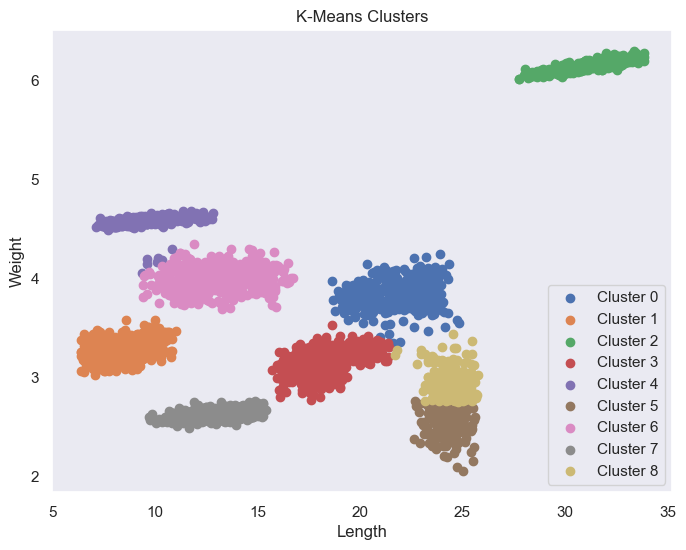

In [138]:
# Train K-Means with optimal K
kmeans = KMeans(n_clusters=9, random_state=42) # K value
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)
# 2D scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(9):  # Adjust based on the number of clusters
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['length'], cluster_data['weight'], label=f'Cluster {cluster}')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('K-Means Clusters')
plt.legend()
plt.show()


# Neuronal Networks
## Multilayer Perceptron (MLP)
### Classification
* Scaly hairfin anchovy and Pama croaker overlap

Parameter:
* hidden_layer_size: Number of Neurons in the hidden layer (Default: (100,))
* activation: The activationfunction (Default: relu)
* solver: For weight optimization (Method to determine the weights for every neuron) (Default: adam)
* learning_rate: When weight updates should be scheduled (Default: constant)
Ofcourse

Score:
*Accuracy 0.94 is good, but the Scaly hairfin anchovy and the Pama croaker overlap (Same wheight and height)



In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

X = df[['length', 'weight']]
y = df['species']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=500, activation='tanh', random_state=42) #loops 500 times

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
# Calculation of probability
y_prob = mlp.predict_proba(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("probability of 100 test instances:")
print(np.round(y_prob[:5], 3)) # 3 comma digits

Confusion Matrix:
[[ 75   0   0   0   0   0   0  16   0]
 [  0 120   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0]
 [  1   0   0  76   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [ 42   0   0   0   0   0   0  58   0]
 [  0   0   0   0   0   0   0   0  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        91
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        86
           3       1.00      0.99      0.99        77
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        89
           7       0.78      0.58      0.67       100
           8       1.00      1.00      1.00        65

    accuracy                           0.93       816
   macro a

### Regression

In [140]:
from sklearn.metrics import mean_absolute_error

X = df[['length', 'weight']]
y = df['species_numeric']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_scale = scaler.transform(X_test)  

# Define the MLPClassifier
mlp = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=1000, activation='relu', learning_rate='adaptive', random_state=42) #loops 200 times

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(x_scale)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse) # Difference between y_test and y_pred = better model performance
print("Mean Absolute Error:", mae) # average absolute difference between predictions and true values = better model performance
print("R² Score:", r2)

Mean Squared Error: 2.0136472512086128
Mean Absolute Error: 0.7153099938441886
R² Score: 0.691911333433189


## Vergleich von mind. drei verschiedenen ML Klassifikatoren/Regressoren anhand der Ergebnisse der Validierung mithilfe der Testdaten

### Linear-Regression:
* Accuracy (R2):  0.016172009438415236
MLP-Regression
* Accuracy (R2): 0.691911333433189
KNN-Regression:
* Accuracy (R2): 0.6229783869804264

The Regression is not pefekt for our Model, because we want to predict the Species (Class) of a Fish. 
The species is a categorical value, which means that the Classification works better.

R2 value:
* 80%-100%: strong correlation
* 50%-80%: Moderate correlation (Not perfect)
...


## Mindestens drei Erkenntnisse im ML Prozess, die euch überrascht haben bei eurer Arbeit

### 1. Regression in our Model
We want to predict the Species of a Fish, which means that the regressor does not work well, because it is used for numeric values.
### 2. Features in the Learning Process
The more features we use, the more accurate our model gets.
### 3. ?